In [1]:
from google.colab import drive
drive.mount("/content/mydrive/")
%cd /content/mydrive/MyDrive/LTSF_Linear

import os
from _data_provider.data_loader_wq import get_ydata, get_xdata
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

root_path = "dataset/Water_Week"

dir_list = sorted(os.listdir(root_path))

Drive already mounted at /content/mydrive/; to attempt to forcibly remount, call drive.mount("/content/mydrive/", force_remount=True).
/content/mydrive/MyDrive/LTSF_Linear


## `median_split`
- **returns**:  중앙값(median) 기준으로 두 그룹으로 나눈 각 그룹의 컬럼 1개 평균값을 담은 `list` 두 개

In [2]:
def median_split(dir:str, target:str, column:str):
    """_summary_
    Args:
        dir (str): _description_
        target (str): _description_
        column (str): _description_
    Returns:
        list, list
    """
    in_cols, target_cols, df_target = get_ydata(root_path, dir)
    median_target = df_target[target].median()
    index_listG = list(df_target[df_target[target] > median_target].index)
    index_listL = list(df_target[df_target[target] <= median_target].index)

    data_list = sorted(glob(os.path.join(root_path, dir, "csv/*.csv")))
    cnt = 0
    path_listG = []
    path_listL = []
    for file in data_list:
        if cnt in index_listG:
            path_listG.append(file)
        elif cnt in index_listL:
            path_listL.append(file)
        cnt += 1

    weekly_meanG = []
    for file in path_listG:
        df_ = pd.read_csv(file)
        features = df_.columns.intersection(in_cols)
        x_data = df_[features].mean()
        mean = x_data[column].mean()
        weekly_meanG.append(mean)

    weekly_meanL = []
    for file in path_listL:
        df_ = pd.read_csv(file)
        features = df_.columns.intersection(in_cols)
        x_data = df_[features].mean()
        mean = x_data[column].mean()
        weekly_meanL.append(mean)


    return weekly_meanG,  weekly_meanL

## `return_dataframes`
- **returns**: 두 그룹을 class컬럼으로 구분한 `pd.DataFrame` 한 개와, 각 그룹의 평균값을 담은` pd.DataFrame` 두 개

In [3]:
def return_dataframes(dir:str, target:str, column:str):
    """_summary_
    Args:
        dir (str): _description_
        target (str): _description_
        column (str): _description_
    Returns:
        pd.DataFrame, pd.DataFrame, pd.DataFrame 
    """
    G, L = median_split(dir, target, column)

    df_greater = pd.DataFrame(G)
    df_greater["class"] = f"{target} > median"
    df_greater.columns = [f"mean_of_{column}", "class"]

    df_lesser = pd.DataFrame(L)
    df_lesser["class"] = f"{target} <= median"
    df_lesser.columns = [f"mean_of_{column}", "class"]

    df_class = pd.concat([df_greater, df_lesser], axis=0, ignore_index=True)
    df_class.columns = [f"mean_of_{column}", "class"]

    return df_class, df_greater, df_lesser

## `box_swarm_plot`
- **기능**: 지점, 타겟, 컬럼이 각 1개씩 모두 정해지면 `boxplot`과 `swarmplot` 한장을 `show`

In [4]:
def box_swarm_plot(dir:str, target:str, column:str):
    df_class, _, _ = return_dataframes(dir, target, column)
    sns.boxplot(data=df_class, x="class", y=f"mean_of_{column}")
    sns.swarmplot(data=df_class, x="class", y=f"mean_of_{column}",  color=".25")
    #plt.show()

## `target_dic`

In [5]:
target_dic_172 = {'C001팔당2취': ["2-MIB", "Geosmin"],
            'D001청주정': ["2-MIB", "Geosmin", "blue-green_algae", "diatomeae"],
            'D002구미': ["2-MIB", "Geosmin", "blue-green_algae", "diatomeae"],
            'D003고령': ["2-MIB", "Geosmin", "diatomeae"],
            'E003본포': ["2-MIB", "Geosmin", "blue-green_algae", "diatomeae"],
            'E004남강': ["2-MIB", "Geosmin"]}

In [6]:
target_dic_21 = {
            'D001청주정': ["blue-green_algae"],
            'D002구미': ["blue-green_algae", "diatomeae"],
            'D003고령': ["diatomeae"],
            }

## Iterate over `target_dic`

In [7]:
def iterate_over_target_dic(target_dic:dict):
    figures = []
    #count_1, count_2, count_3 = 0, 0, 0
    for key in target_dic:
        for target in target_dic[key]:
            in_cols, _, _ = get_ydata(root_path, key)
            df_raw = get_xdata(root_path, key)
            x_data = df_raw[df_raw.columns.intersection(in_cols)]
            
            for column in x_data.columns:
                fig = plt.figure()
                plt.title(f"{key[:4]} {target}")
                box_swarm_plot(key, target, column)
                figures.append(fig)
                #count_3 += 1
                #break
            #count_2 += 1   
            #break
        #count_1 += 1
        #break
        #print()

    
    return figures

In [8]:
def save_figures(save_path:str, figures:list):
    for i, fig in enumerate(figures):
        fig.savefig(f"{save_path}/figures_{i}.png")
    print(f"Your figures has been saved at {save_path}.")

Your figures has been saved at _figures.


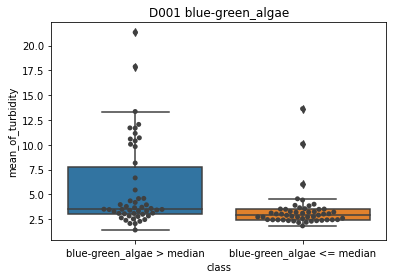

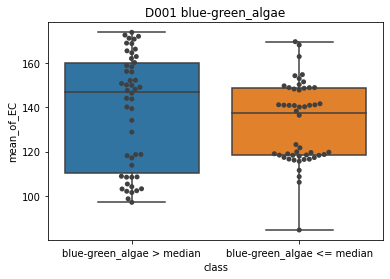

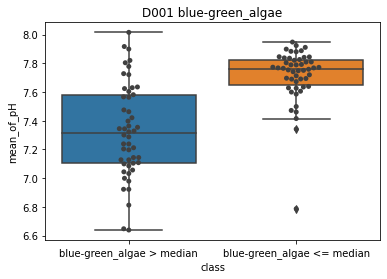

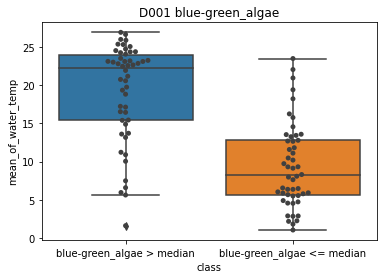

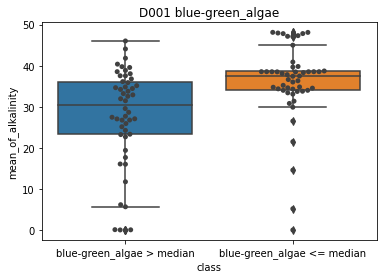

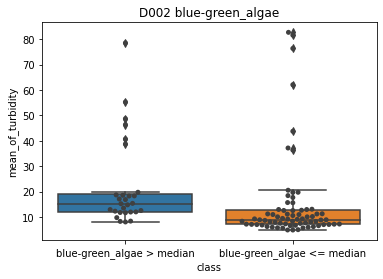

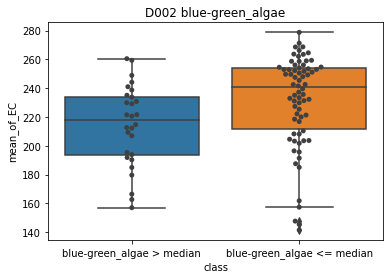

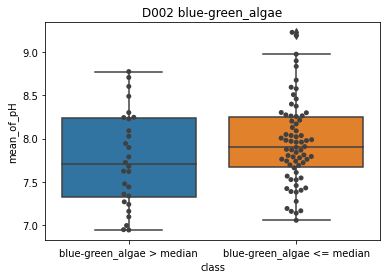

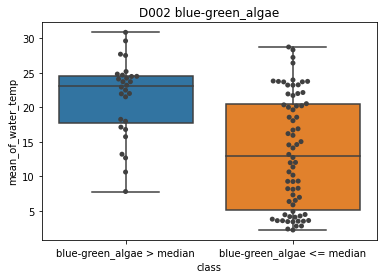

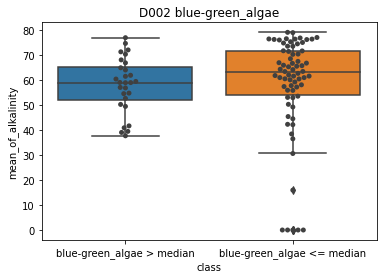

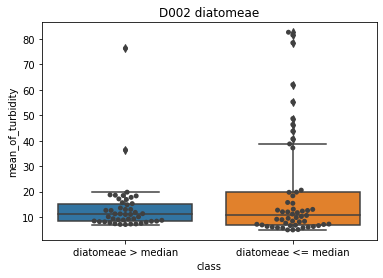

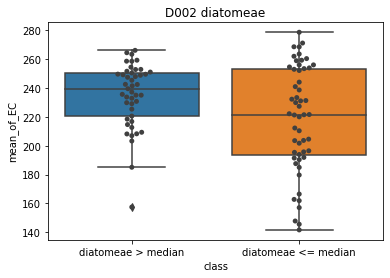

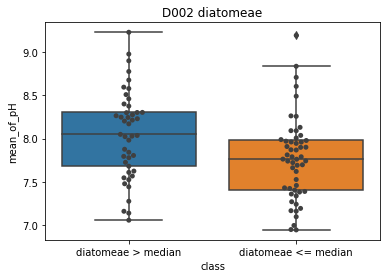

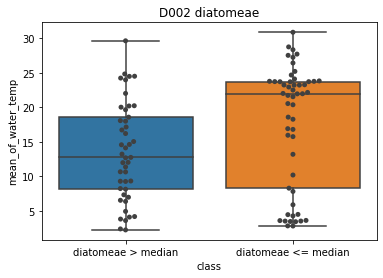

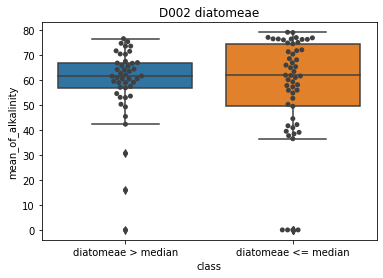

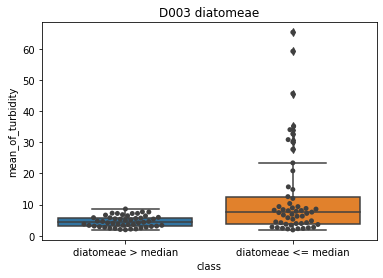

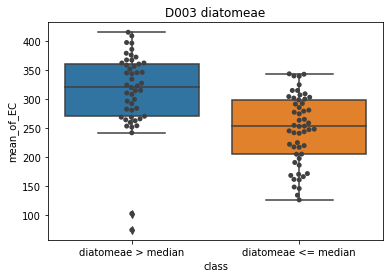

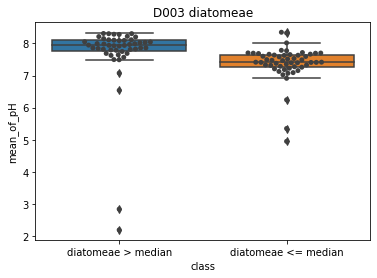

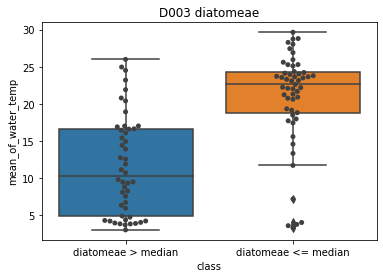

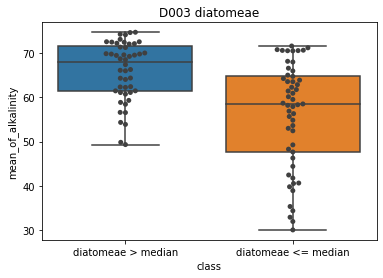

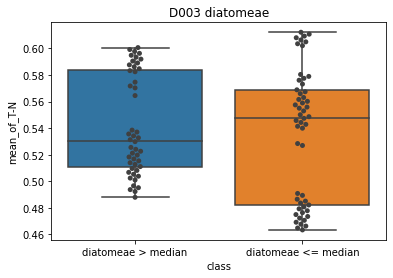

In [9]:
figures = iterate_over_target_dic(target_dic_21)
save_figures("_figures", figures)